# Lesson 1  Homework - Where's your city?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import os
import random
from collections import defaultdict
import pandas as pd
import re

## Looking at the data

In [3]:
torch.cuda.set_device(0)

In [4]:
path = Path('/home/henripal/projects/maps/scraper/')

In [5]:
path.ls()

[PosixPath('/home/henripal/projects/maps/scraper/scraper'),
 PosixPath('/home/henripal/projects/maps/scraper/img'),
 PosixPath('/home/henripal/projects/maps/scraper/data')]

In [6]:
path_img = path/'img'

In [7]:
fnames = get_image_files(path_img)

In [8]:
city_to_file = defaultdict(list)

In [9]:
for fname in fnames:
    city_to_file[fname.stem[:-1]].append(fname)

In [10]:
city_list = list(city_to_file.keys())

In [11]:
random.shuffle(city_list)

In [12]:
train_pct = 0.80
train_idx = int(len(city_list) * train_pct) ; train_idx

17884

In [13]:
target_paths = []
target_labels = []
pat = r',+([A-z_+-ô\"\'\(\)]+)\d+.png$'
for train_city in city_list[:train_idx]:
    for train_file in city_to_file[train_city]:
        target_paths.append(str(Path('train',train_file.name)))
        country_name= re.search(pat, str(train_file)).group(1)
        target_labels.append(country_name)
for train_city in city_list[train_idx:]:
    for train_file in city_to_file[train_city]:
        target_paths.append(str(Path('test',train_file.name)))
        country_name= re.search(pat, str(train_file)).group(1)
        target_labels.append(country_name)

In [14]:
df = pd.DataFrame({
    'label': target_labels,
    'name': target_paths,
})

In [15]:
df = df[['name', 'label']]

In [16]:
df

,name,label
0,"train/Agudos,Brazil1.png",Brazil
1,"train/Agudos,Brazil3.png",Brazil
2,"train/Agudos,Brazil0.png",Brazil
3,"train/Agudos,Brazil2.png",Brazil
4,"train/Ejmiatsin,Armenia1.png",Armenia
5,"train/Ejmiatsin,Armenia3.png",Armenia
6,"train/Ejmiatsin,Armenia2.png",Armenia
7,"train/Ejmiatsin,Armenia0.png",Armenia
8,"train/Loei,Thailand3.png",Thailand
9,"train/Loei,Thailand1.png",Thailand


In [31]:
df.to_csv(path_img/'labels.csv',index=False)

In [17]:
for train_city in city_list[:train_idx]:
    for train_file in city_to_file[train_city]:
        start_file = str(train_file)
        target_file = str(train_file.parent/'train'/train_file.name)
        os.rename(start_file, target_file)

In [18]:
for train_city in city_list[train_idx:]:
    for train_file in city_to_file[train_city]:
        start_file = str(train_file)
        target_file = str(train_file.parent/'test'/train_file.name)
        os.rename(start_file, target_file)

In [33]:
data2 = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), size=224, bs=256)
data2.normalize(imagenet_stats)

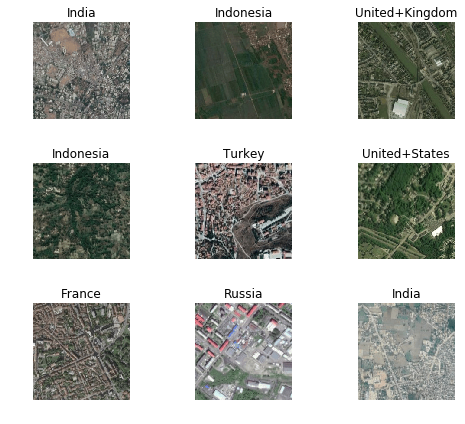

In [34]:
data.show_batch(rows=3, figsize=(7,6))

In [36]:
print(data.classes)
len(data.classes),data.c

['Brazil', 'Armenia', 'Thailand', 'Algeria', 'China', 'United+Kingdom', 'South+Korea', 'Hungary', 'Central+African+Republic', 'Poland', 'Venezuela', 'Germany', 'France', 'Argentina', 'Russia', 'Cuba', 'Spain', 'Mexico', 'Japan', 'Philippines', 'Ukraine', 'Italy', 'Macedonia', 'India', 'Portugal', 'Ghana', 'Madagascar', 'United+States', 'Indonesia', 'Slovakia', 'Malaysia', 'Czech+Republic', 'Romania', 'Sri+Lanka', 'Bulgaria', 'Guinea', 'Colombia', 'Vietnam', 'Turkey', 'Seychelles', 'Pakistan', 'Chad', 'Cambodia', 'Iraq', 'Finland', 'Belarus', 'Afghanistan', 'Burkina+Faso', 'South+Africa', 'Australia', 'Peru', 'Kenya', 'Tunisia', 'Denmark', 'Canada', 'Namibia', 'Nigeria', 'Zambia', 'Iran', 'El+Salvador', 'Myanmar', 'Greece', 'Ethiopia', 'Sweden', 'Oman', 'Egypt', 'Bhutan', 'Belgium', 'Azerbaijan', 'Mozambique', 'Libya', 'Ivory+Coast', 'Croatia', 'East+Timor', 'Niger', 'Netherlands', 'Albania', 'Dominican+Republic', 'Somalia', 'Tanzania', 'Kosovo', 'French+Guiana', 'Ireland', 'Cameroon', 

(244, 244)

## Training: resnet34

In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(1)

Total time: 01:52
epoch  train_loss  valid_loss  error_rate
1      2.000707    1.659826    0.423973    (01:52)



In [24]:
learn.fit_one_cycle(2)

Total time: 03:40
epoch  train_loss  valid_loss  error_rate
1      1.690882    1.425082    0.384444    (01:50)
2      1.445255    1.278760    0.345639    (01:50)



In [25]:
learn.fit_one_cycle(4)

Total time: 07:22
epoch  train_loss  valid_loss  error_rate
1      1.401406    1.287930    0.351142    (01:49)
2      1.383692    1.219844    0.334019    (01:50)
3      1.237458    1.108262    0.312337    (01:50)
4      1.144355    1.069324    0.300384    (01:51)



In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

## Results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(16, max_lr=slice(1e-7,1e-6))

In [ ]:
learn.save('finetuned_cities_0.1')

In [ ]:
learn.load('finetuned_cities')


In [ ]:
i = 5
img = open_image(learn.path/'train'/os.listdir('../scraper/img/train')[i])
os.listdir('../scraper/img/train')[i]

In [ ]:
img

In [ ]:
learn.predict(img)

In [ ]:
learn.path, learn.model_dir


In [ ]:
get_transforms()

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=32)
data.normalize(imagenet_stats)

In [ ]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In this case it doesn't, so let's go back to our previous model.

In [ ]:
learn.load('stage-1-50')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=1)